# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [34]:
zero_price_count = (ds['price']==0).sum()
print(zero_price_count)

60


In [35]:
import pandas as pd
ds_filtered = ds[ds['price']!=0]
ds_filtered = ds_filtered.reset_index(drop=True)
ds_filtered

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15270,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15271,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15272,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15273,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [42]:
max_price = ds["price"].max()
print(max_price)   
max_price_address = ds[ds['price'] == max_price].reset_index()
max_address = max_price_address.at[0, 'address']
print(max_address)         
print(f'The house with address {max_address} is the most expensive and its price is {str(max_price)} USD')

8500000
El Escorial
The house with address El Escorial is the most expensive and its price is 8500000 USD


The house with address Zurita, Madrid is the most expensive and its price is 8500000 USD

#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [49]:
min_price = ds_filtered["price"].min()
print(min_price)
min_price_address = ds_filtered[ds_filtered["price"] == min_price].reset_index()
min_address = min_price_address.at[0,'address']
print(min_address)

102600
Galapagar


Before clean up there were several addresses with no price. After data clean up, the house with address Galapgar is the cheapest at 102600 USD.

#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [58]:
max_surface = ds['surface'].max()
print(max_surface)
max_surface_address = ds['address'].max()
print(max_surface_address)
min_surface = ds['surface'].min()
print(min_surface)
min_surface_address = ds['address'].min()
print(min_surface_address)

249000.0
Zurita,  Madrid Capital
15.0
 Madrid Capital


The biggest house is located in Zurita, Madrid Capital and its surface is 249000 meters.

The smallest house is located in Madrid Capital with surface of 15 meters.

#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [66]:
num_populations = ds['level1'].nunique()
print(num_populations)
num_populations = ds['level2'].nunique()
print(num_populations)
num_populations = ds['level3'].nunique()
print(num_populations)
num_populations = ds['level4'].nunique()
print(num_populations)
num_populations = ds['level5'].nunique()
print(num_populations)

1
1
7
77
168


Population level1 is 1, population level2 is 1, population level 3 is 7, population level4 is 77, population level5 is 168.

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [73]:
contains_nas = ds.isnull().values.any()
if contains_nas:
    print(True)
else:
    print(False)
columns_with_nas = ds.columns[ds.isnull().any()]
print(columns_with_nas)

True
Index(['realEstate_name', 'phone_realEstate', 'rooms', 'bathrooms', 'surface',
       'description', 'level4', 'level6', 'level7', 'level8', 'zipCode',
       'customZone'],
      dtype='object')


Yes, it contains NAs that are listed above.

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [78]:
import pandas as pd
import numpy as np
ds_remove_columns = ds.dropna()
print(ds_remove_columns)
ds_remove_rows = ds.dropna()
print(ds_remove_rows)

Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]
Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [9]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations_price = ['Arroyomolinos']
price = ds[ds['level5'].isin(locations_price)]
mean_price = ds['price'].mean
print(mean_price)

<bound method Series.mean of 0        195000
1         89000
2        390000
3         89000
4        172000
          ...  
15330    259470
15331    165000
15332    495000
15333    195000
15334    765000
Name: price, Length: 15335, dtype: int64>


Mean price in the population of Arroyomolinos is 195000 USD.

#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

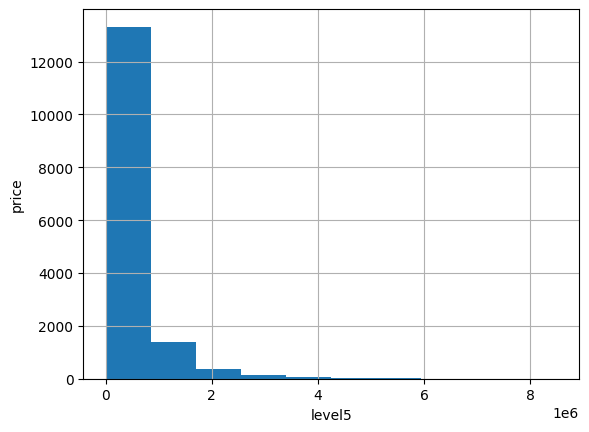

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations_price = ['Arroyomolinos']
price_compare = ds[ds['level5'].isin(locations_price)]
prices = ds['price']
prices.hist()
plt.xlabel('level5')
plt.ylabel('price')
plt.show()


**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Are the averages of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [3]:
import pandas as pd
import numpy as np
ds = pd.read_csv('assets/real_estate.csv', sep=';')
search_address = 'Galapagar'
result = ds[ds['address'] == search_address]
ds_filtered = ds[ds['address'] == search_address]
mean_price = ds_filtered['price'].mean
print(mean_price)

<bound method Series.mean of 617      420000
733      278000
1449     365000
1450     365000
1453     365000
2710     299500
2719     289000
2722     155000
3455     596000
3456     425000
3458     410000
3459     430000
4375     102600
4705     350000
4752     260000
4771     295000
4776     349000
4779     374000
4783     295000
4972     127000
5161     157260
5192     399000
5685     525000
5857     430000
5890     695000
6341     170000
6466     450000
6869     145000
6889     117800
8571     360000
8578     325000
9878     260000
10070    495000
10157    430000
10176    495000
10384    380000
11150    450000
12751    470000
13095    212428
13332    220000
13333    340000
13336    364000
13338    425000
13339    139000
13340    470000
14025    173000
14850    415000
Name: price, dtype: int64>


In [34]:
import pandas as pd
import numpy as np
search_address = 'Valdemorillo'
result = ds[ds['address'] == search_address]
ds_filtered = ds[ds['address'] == search_address]
mean_price = ds_filtered['price'].mean
print(mean_price)

<bound method Series.mean of 390      160000
823      359000
2028     396800
3521     395000
4916     300000
4946     160000
5578     470000
6033     495000
6452     375000
6455     290000
6921     248000
6937     675000
6967     675000
7068     396800
7098     396800
10179    375000
10424    315000
12205    280000
12596    262500
13124    265000
13128    295000
13130    285000
13131    333000
13137    375000
13138    248000
13140    289000
13227    200000
13737    234999
13754    229999
13917    262500
14262    450000
14887    312000
14911    530000
14913    275000
Name: price, dtype: int64>


The average prices are not the same. Valdemorillo mean price is 160000 USD and Galapagar is 420000 USD.

#### Exercise 10. Are the averages of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [10]:
import pandas as pd
import numpy as np
locations_ppsm = ['Valdemorillo', 'Galapagar']
ppsm_compare = ds[ds['level5'].isin(locations_ppsm)]
result = ds[ds['address'] == search_address]
ds_filtered = ds[ds['address'] == search_address]
mean_surface = ds_filtered['surface'].mean
print(mean_surface)

<bound method Series.mean of 617      400.0
733      240.0
1449     270.0
1450     270.0
1453     270.0
2710     300.0
2719     140.0
2722     105.0
3455     448.0
3456     320.0
3458     350.0
3459     230.0
4375      68.0
4705     220.0
4752     148.0
4771     240.0
4776     276.0
4779     250.0
4783     240.0
4972      40.0
5161       NaN
5192     290.0
5685       NaN
5857     250.0
5890     800.0
6341     120.0
6466     300.0
6869      85.0
6889      80.0
8571     270.0
8578     200.0
9878     148.0
10070    300.0
10157    237.0
10176    222.0
10384    340.0
11150    250.0
12751    416.0
13095     90.0
13332    127.0
13333    315.0
13336    240.0
13338    250.0
13339    100.0
13340    416.0
14025    100.0
14850    291.0
Name: surface, dtype: float64>


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

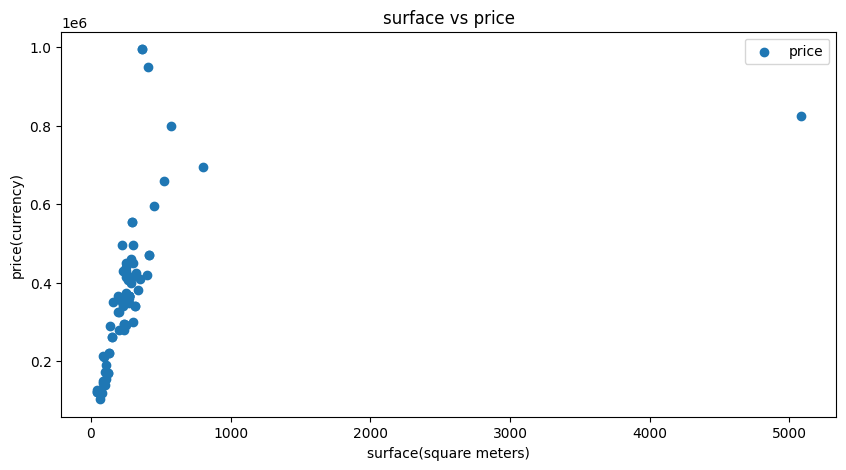

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations_price = ['Valdermorillo', 'Galapagar']
price_compare = ds[ds['level5'].isin(locations_price)]
plt.figure(figsize = (10, 5))
plt.scatter(x='surface', y='price', data=price_compare)
plt.xlabel('surface(square meters)')
plt.ylabel('price(currency)')
plt.title("surface vs price")
plt.legend()
plt.show()

The bigger the surface area the higher the price.

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [14]:
ds = pd.read_csv('assets/real_estate.csv', sep=';')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(ds.columns)
num_populations = ds['realEstate_name']
num_populations.realEstate_name = ds['realEstate_name'].nunique()
print(num_populations.realEstate_name)


Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')
1821


There are 1821 real estate agencies.

#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [21]:
ds = pd.read_csv('assets/real_estate.csv', sep=';')
print(ds.columns)
level5_counts = ds['level5'].value_counts()
most_houses_level5 = level5_counts.idxmax()
most_houses_count = level5_counts.max()
print(level5_counts)

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')
level5
 Madrid Capital        6643
Alcalá de Henares       525
Las Rozas de Madrid     383
Móstoles                325
Getafe                  290
                       ... 
Ambite                    1
Navarredonda              1
Braojos                   1
Piñuécar-gandullas        1
Brea de Tajo              1
Name: count, Length: 168, dtype: int64


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations = ['Fuenlabrada', 'Leganés', 'Gatafe,' 'Alcorcón']
price_compare = ds[ds['level5'].isin(locations)]
median_prices  = price_compare.groupby('level5')['price'].median().reset_index()

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

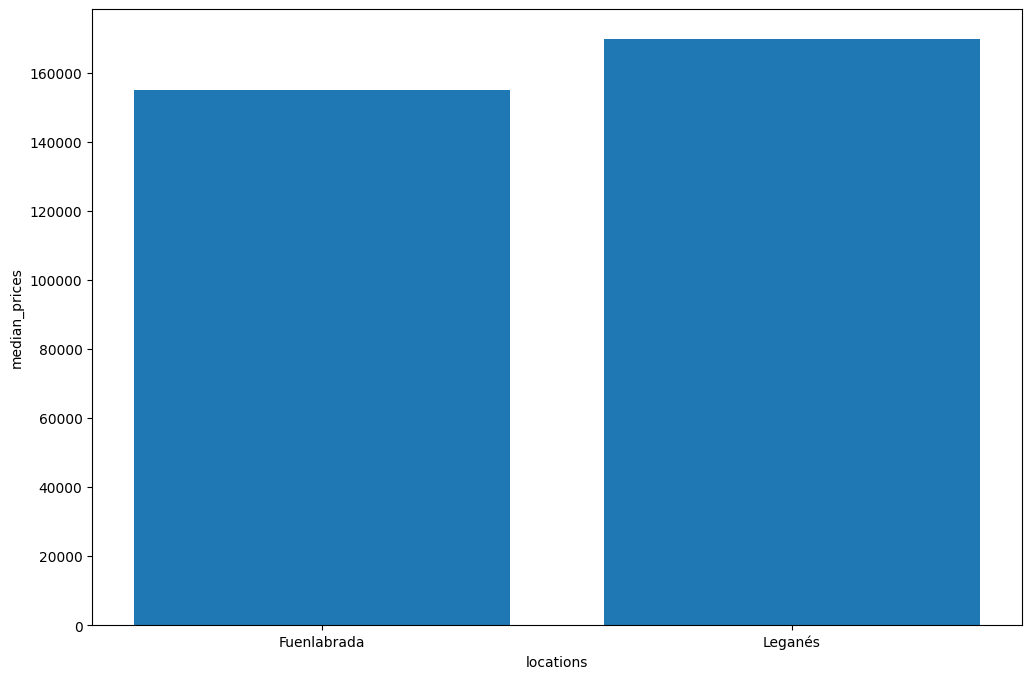

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations = ['Fuenlabrada', 'Leganés', 'Gatafe,' 'Alcorcón']
price_compare = ds[ds['level5'].isin(locations)]
median_prices  = price_compare.groupby('level5')['price'].median().reset_index()
plt.figure(figsize=(12,8))
plt.bar(median_prices['level5'], median_prices['price'])
plt.xlabel('locations')
plt.ylabel('median_prices')
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations = ['Fuenlabrada', 'Leganés', 'Gatafe,' 'Alcorcón']
price_compare = ds[ds['level5'].isin(locations)]
mean_prices  = price_compare.groupby('level5')['price'].mean().reset_index()
variables = ['price', 'rooms', 'surface', 'bathrooms']
variances = ds[variables].var()
means = ds[variables].mean()
print(means)
print(variances)

price        477303.566417
rooms             3.231611
surface         196.916436
bathrooms         2.150233
dtype: float64
price        3.496289e+11
rooms        1.940746e+00
surface      4.764434e+06
bathrooms    1.669469e+00
dtype: float64


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
price_compare = ds[ds['level5'].isin(locations)]
max_prices  = price_compare.loc[price_compare.groupby('level5')['price'].idxmax()]
print(max_prices)
#print(price_compare)

       Unnamed: 0  id_realEstates  isNew  \
5585         5586       153275915  False   
11561       11562       153660921  False   
2881         2882       151105544  False   
10412       10413       152251506  False   

                               realEstate_name  phone_realEstate  \
5585                 100 home red inmobiliaria       912669623.0   
11561                              unna madrid       912780846.0   
2881                   unna grupo inmobiliario       912665694.0   
10412  bafre gestion y servicios inmobiliarios       910752245.0   

                                            url_inmueble  rooms  bathrooms  \
5585   https://www.fotocasa.es/es/comprar/vivienda/ca...    6.0        6.0   
11561  https://www.fotocasa.es/es/comprar/vivienda/va...    4.0        3.0   
2881   https://www.fotocasa.es/es/comprar/vivienda/ma...    6.0        4.0   
10412  https://www.fotocasa.es/es/comprar/vivienda/co...    6.0        5.0   

       surface    price  ... level4Id level5Id 

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

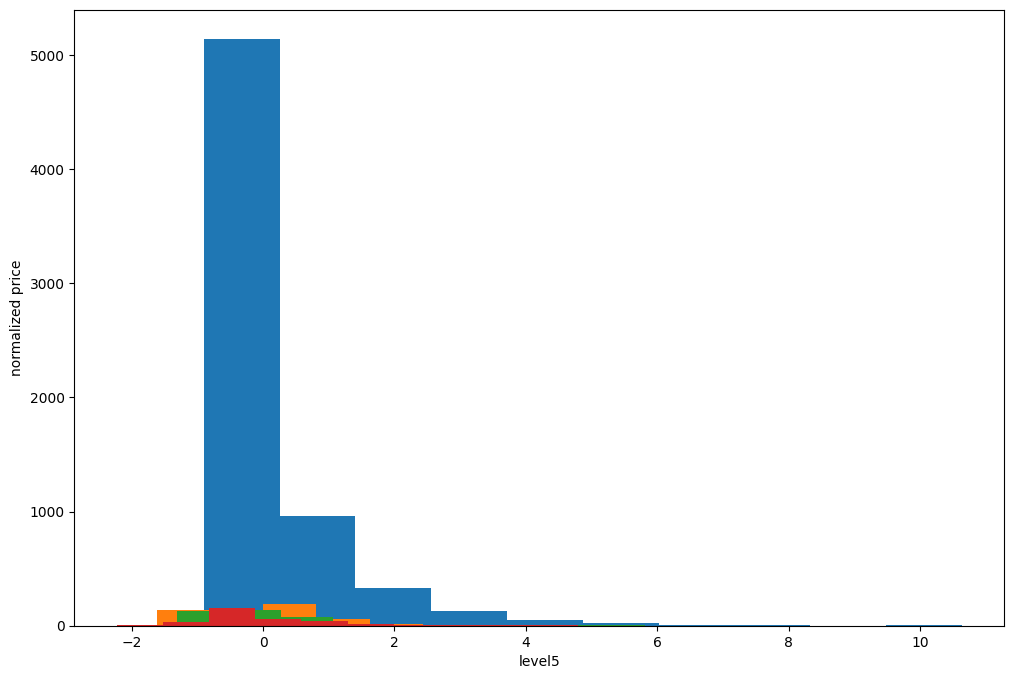

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations = ['Fuenlabrada', 'Leganés', 'Gatafe,' 'Alcorcón']
price_compare = ds[ds['level5'].isin(locations)]
median_prices  = price_compare.groupby('level5')['price'].median().reset_index()
ds['normalized_price'] = ds.groupby('level5')['price'].transform(lambda x: (x - x.mean())/x.std())
num_populations = ds['level5'].value_counts().index[:4]
selected_data = ds[ds['level5'].isin(num_populations)]
plt.figure(figsize=(12,8))
for population in num_populations:
    plt.hist(selected_data[selected_data['level5'] == population]['normalized_price'])
plt.xlabel('level5')
plt.ylabel('normalized price')
plt.show()






**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [11]:
locations_ppsm = ['Getafe', 'Alcorcón']
ppsm_compare = ds[ds['level5'].isin(locations_ppsm)]
for loc in locations_ppsm:
    price_per_squaremeter = (ppsm_compare[ppsm_compare['level5'] == loc]['price'].mean() / ppsm_compare[ppsm_compare['level5'] == loc]['price'])
    print(f'{loc}:')
    print('Price per squaremeter:', price_per_squaremeter)
    print()

Getafe:
Price per squaremeter: 169      0.913933
232      1.928970
233      1.956018
269      2.653058
381      0.582507
           ...   
14999    0.726138
15002    0.931631
15034    0.592932
15087    0.744161
15117    0.642522
Name: price, Length: 290, dtype: float64

Alcorcón:
Price per squaremeter: 85       2.150197
109      0.541344
765      0.927706
816      0.769468
827      1.918858
           ...   
14896    1.704230
15144    0.697185
15166    1.314692
15191    0.723494
15223    0.895218
Name: price, Length: 190, dtype: float64



#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

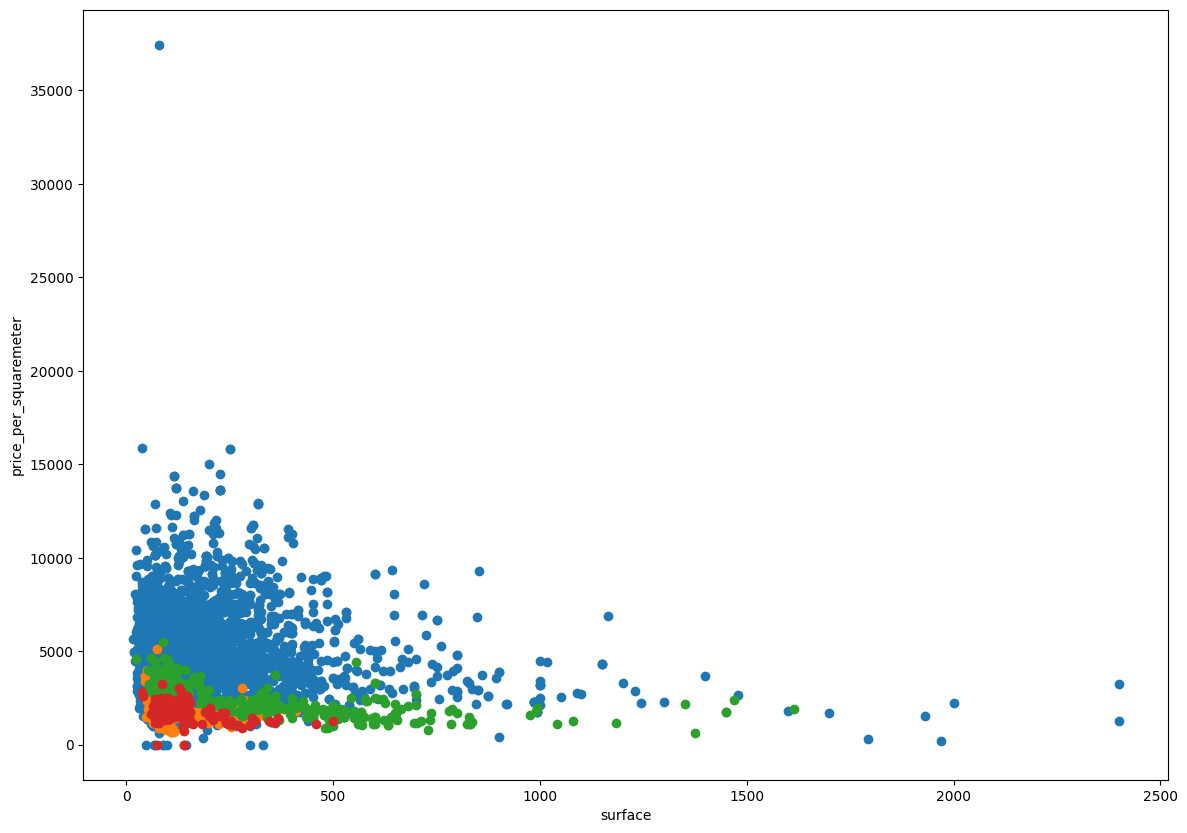

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('assets/real_estate.csv', sep=';')
locations = ['Móstoles', 'Madrid Capital', 'Arroyomolinos', 'Galapagar']
price_compare = ds[ds['level5'].isin(locations)]
median_prices  = price_compare.groupby('level5')['price'].median().reset_index()
if'level5' in ds.columns and 'price' in ds.columns and 'surface' in ds.columns:
    ds['price_per_squaremeter'] = ds['price']/ ds['surface']
    num_populations = ds['level5'].value_counts().index[:4]
else:
    print("Not all present in data frame")
num_populations = ds['level5'].value_counts().index[:4]
selected_data = ds[ds['level5'].isin(num_populations)]
plt.figure(figsize=(14,10))
for population in num_populations:
    plt.scatter(x='surface', y='price_per_squaremeter', data=selected_data[selected_data['level5'] == population])
    plt.xlabel('surface')
    plt.ylabel('price_per_squaremeter')
plt.show()


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

SyntaxError: invalid syntax (1035132850.py, line 1)

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
